In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [47]:
insurance_dataset = pd.read_csv('insurance.csv')

In [48]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [49]:
insurance_dataset.shape

(1338, 7)

In [50]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [51]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [52]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 800x800 with 0 Axes>

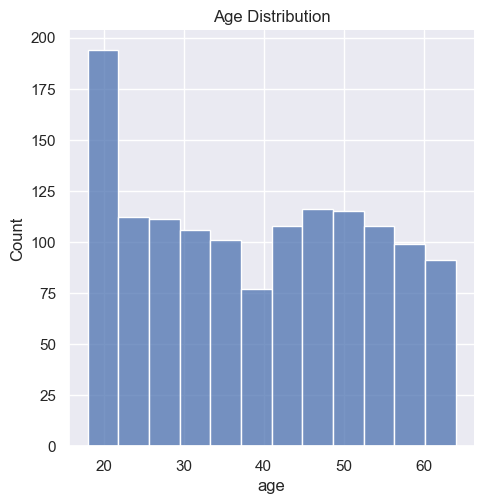

In [53]:
sns.set()
plt.figure(figsize=(8,8))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

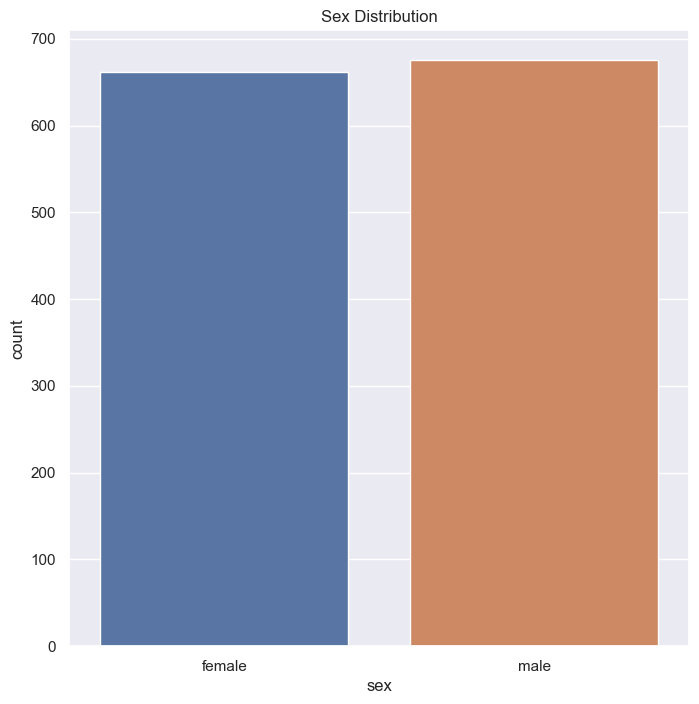

In [9]:
# Gender column
plt.figure(figsize=(8,8))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [10]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 800x800 with 0 Axes>

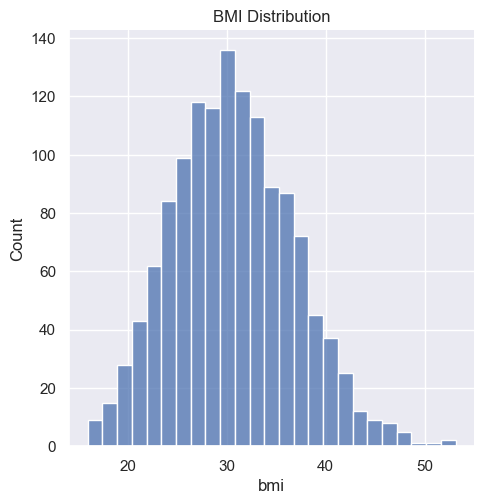

'Normal BMI Range --> 18.5 to 24.9'

In [11]:
# bmi distribution
plt.figure(figsize=(8,8))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

"""Normal BMI Range --> 18.5 to 24.9"""

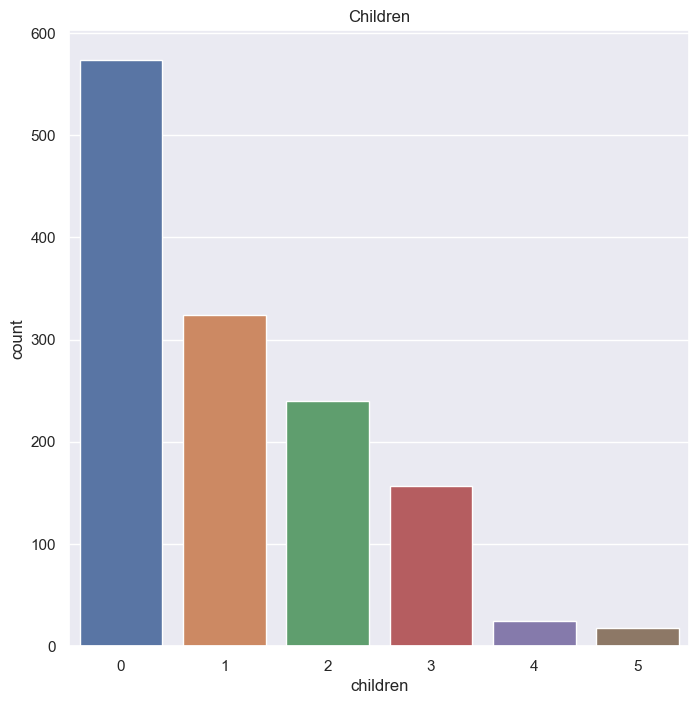

In [12]:
# children column
plt.figure(figsize=(8,8))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [13]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

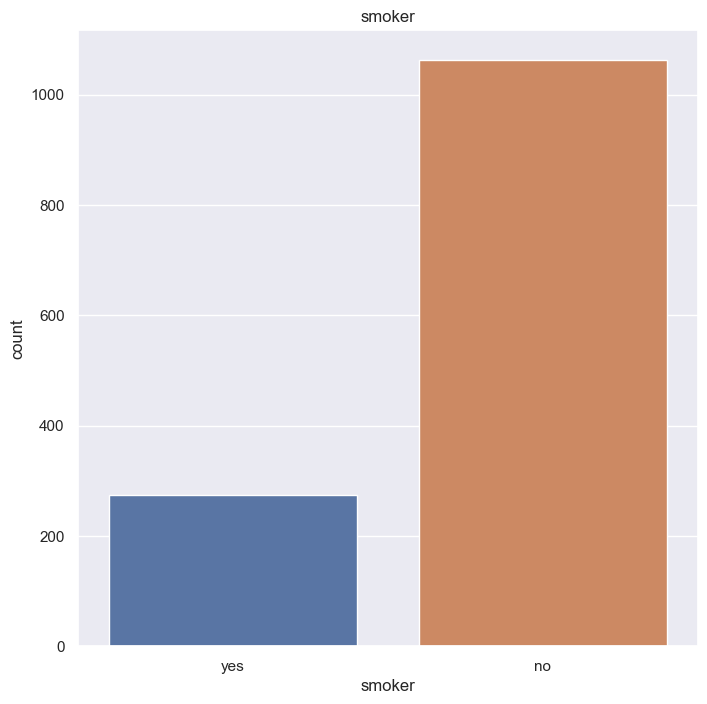

In [14]:
# smoker column
plt.figure(figsize=(8,8))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [15]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

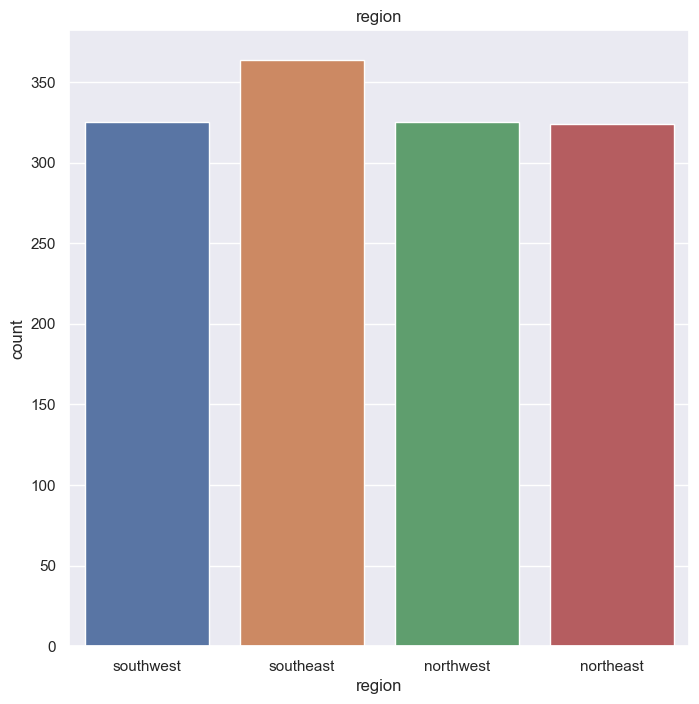

In [17]:
# region column
plt.figure(figsize=(8,8))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [18]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Figure size 800x800 with 0 Axes>

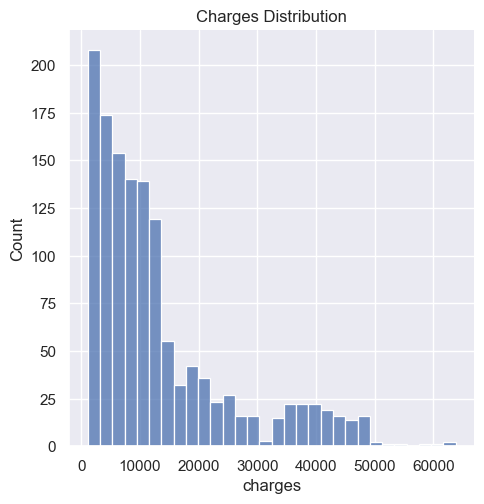

In [16]:
# distribution of charges value
plt.figure(figsize=(8,8))
sns.displot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

In [17]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

In [18]:
3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

In [19]:
# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [20]:
"""Splitting the Features and Target"""

X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

print(X)

print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [21]:
"""Splitting the data into Training data & Testing Data"""

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [22]:
"""Model Training

Linear Regression
"""

# loading the Linear Regression model
regressor = LinearRegression()

regressor.fit(X_train, Y_train)

LinearRegression()

In [23]:
"""Model Evaluation"""

# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [24]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)


R squared vale :  0.751505643411174


In [25]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)
test_data_prediction

array([ 1520.59242161, 11570.5920178 , 10082.43849883,  2246.21754312,
        7881.28362035, 11081.50227956,  3538.24791808,   698.03224036,
       12223.4851558 ,  9611.93217623, 11657.51046259,  4891.0539656 ,
       29947.50192274,  -370.8384887 , 12401.36048618, 13243.21522903,
        3814.42216541,  7883.39384825, 29431.34485576,  2362.83672121,
       12505.50452609,  2256.75277238, 34468.01948464, 31742.4859866 ,
       30306.19118561,  9027.76110059,  1923.87420399, 15247.09503907,
        6542.61302531,  2104.79910554,  9484.36642532,  5794.91649267,
        4425.26853454,  5015.3811241 ,  9579.4545934 ,  4601.74838962,
       29875.58083252,  6797.04084444, 27239.25811383, 13999.0938259 ,
         313.55184653, 28415.75044713,  7886.54751277,  1478.09056648,
       10273.28966107,  8003.09003405, 11612.15283896,  8175.95966058,
       10753.45200738, 13802.18082647,  5740.90172027,  -737.13333209,
       26346.21771217, 37192.66032995,  7364.09646118, 17845.51752284,
      

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684077


In [28]:
"""Building a Predictive System"""

input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [29]:
# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [30]:
prediction = regressor.predict(input_data_reshaped)
print(prediction)

[3760.0805765]


C:\Users\AVISHA GOYAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
print('The insurance cost is USD ', prediction[0])

The insurance cost is USD  3760.0805764960496


In [32]:
"""Prediction using Ridge regression


"""

# Ridge:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge = Ridge.fit(X_train, Y_train)

In [33]:
# Prediction:
y_pred = Ridge.predict(X_test)

In [34]:
# Scores:
print(r2_score(Y_test, y_pred))

0.7448008334274916


In [35]:
"""Prediction using Lasso regression"""

# Lasso:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso = Lasso.fit(X_train, Y_train)

In [36]:
# Prediction:
y_pred = Lasso.predict(X_test)

In [37]:
# Scores:
print(r2_score(Y_test, y_pred))

0.7447245444913575


In [38]:
"""Prediction using Random Forest Regressor

"""

from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(X_train, Y_train)

In [39]:
# Prediction:
y_pred = RandomForestRegressor.predict(X_test)

In [40]:
# Scores:
print(r2_score(Y_test, y_pred))

0.8413628014852713


In [41]:
input_data = (31,1,25.74,0,1,0)

In [42]:
# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [43]:
# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


In [44]:
prediction = RandomForestRegressor.predict(input_data_reshaped)
print(prediction)

[3754.9200915]


C:\Users\AVISHA GOYAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [45]:
print('The insurance cost is USD ', prediction[0])

The insurance cost is USD  3754.9200915000056
